In [189]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [190]:
database_name = 'heart.db'
conn = sqlite3.connect(database_name)

In [191]:
query = "SELECT * FROM patients"
df = pd.read_sql_query(query, conn)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


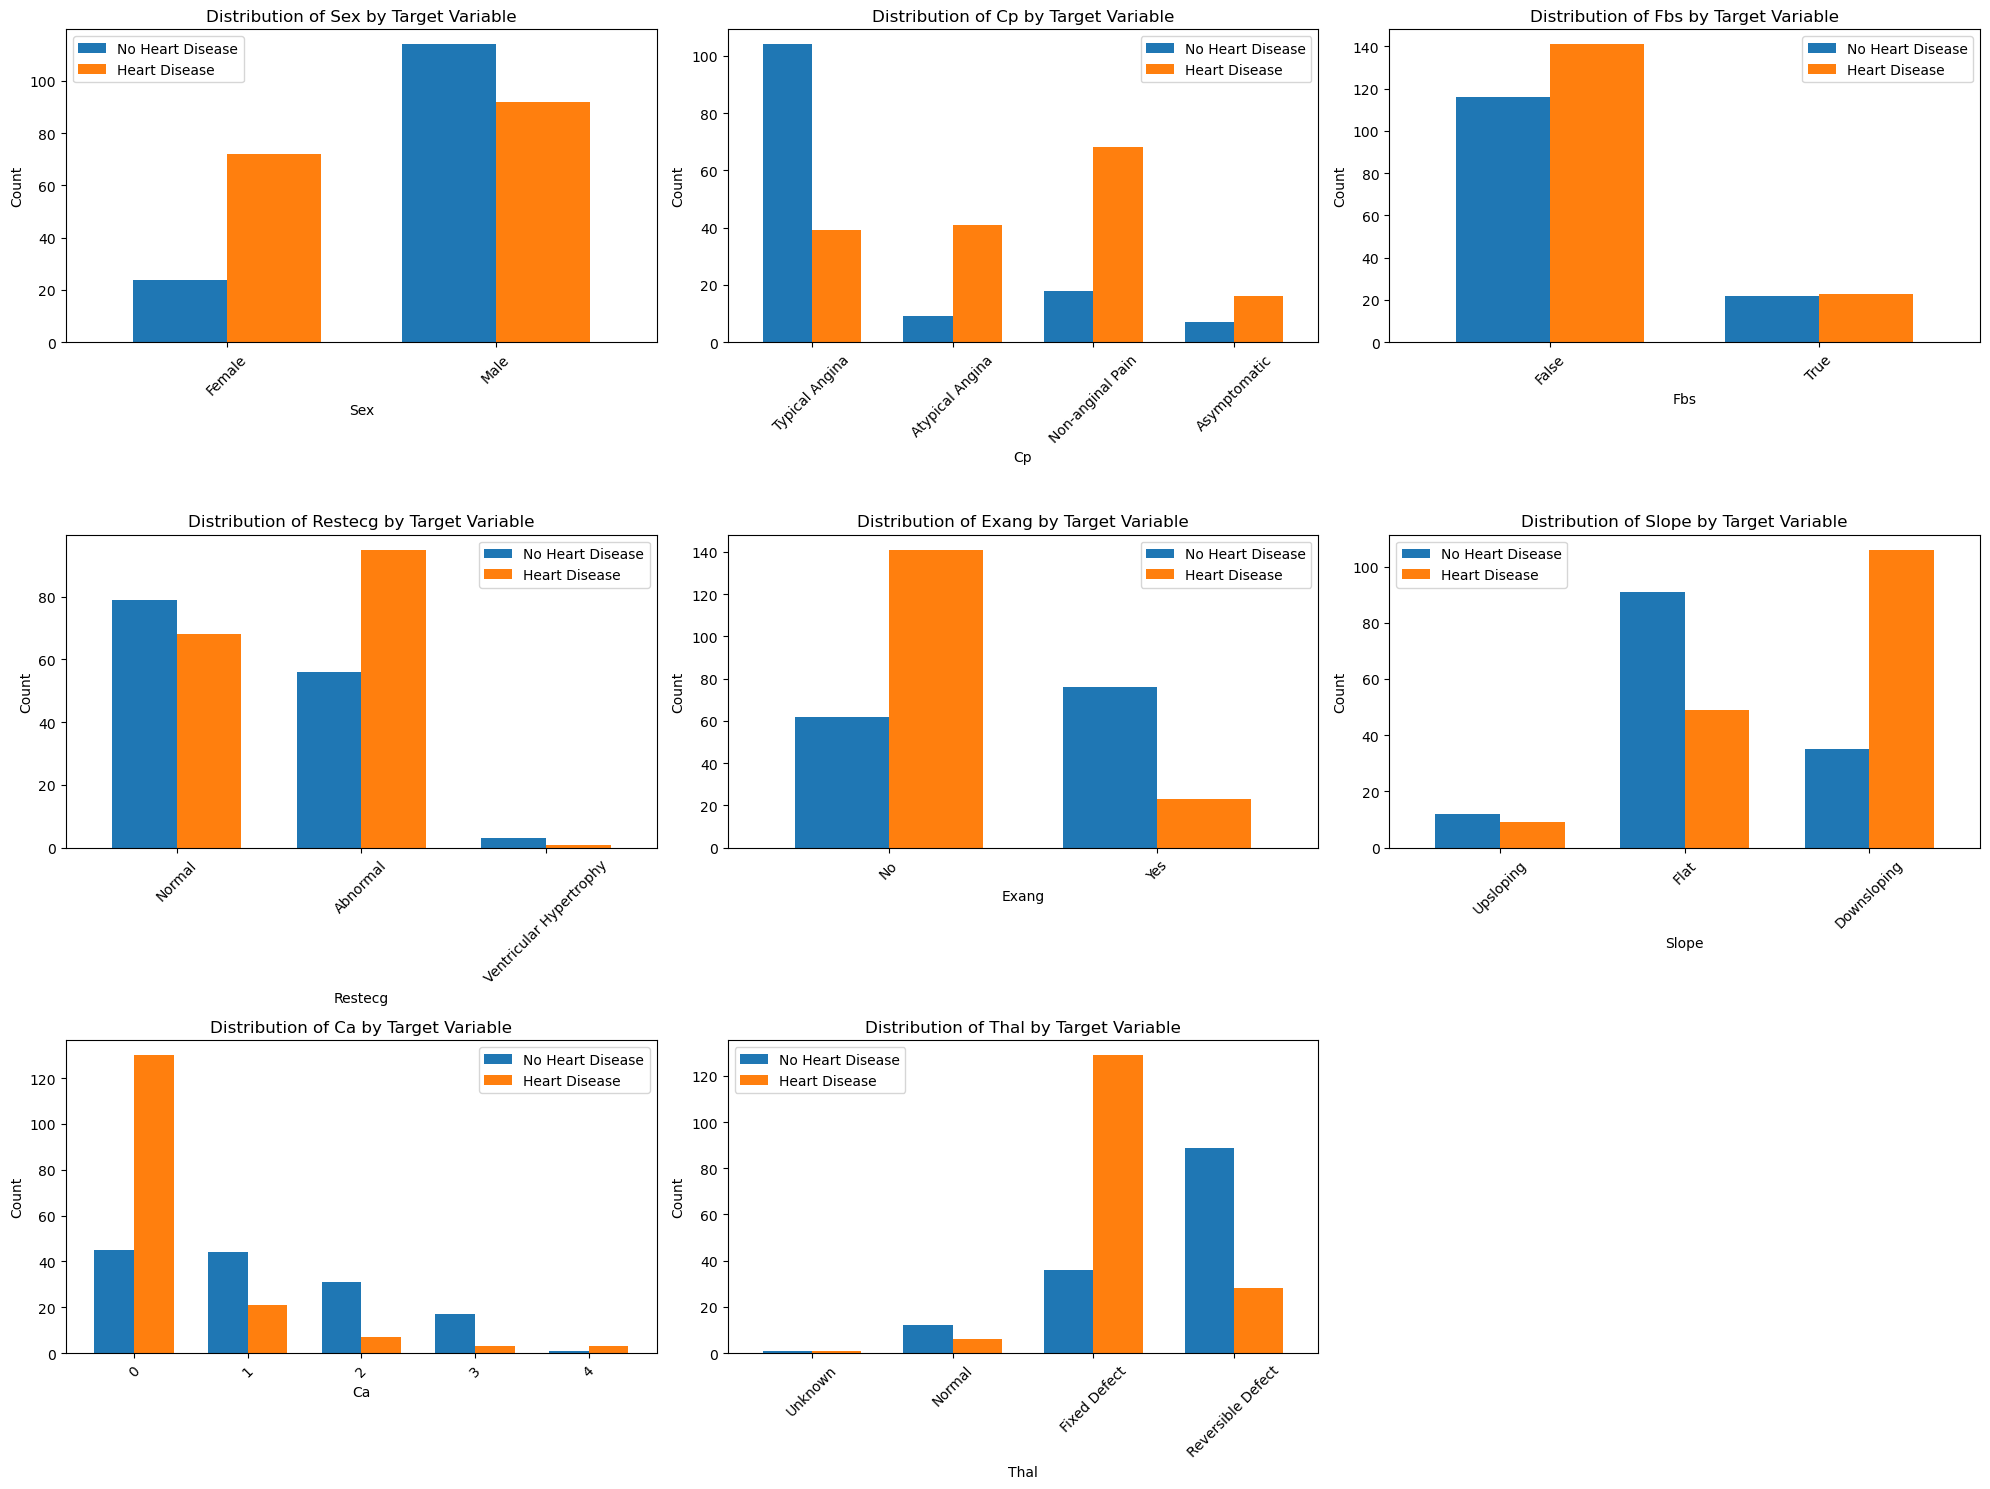

In [192]:
# Ensure the categorical columns are of type 'category'
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for var in categorical_vars:
    df[var] = df[var].astype('category')

# Create integer columns for plotting purposes
for var in categorical_vars:
    df[var + '_plot'] = df[var].astype(int)

# Mapping dictionaries for proper x-axis labels
label_mappings = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'},
    'fbs': {0: 'False', 1: 'True'},
    'restecg': {0: 'Normal', 1: 'Abnormal', 2: 'Ventricular Hypertrophy'},
    'exang': {0: 'No', 1: 'Yes'},
    'slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'ca': {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'},
    'thal': {0: 'Unknown', 1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
}

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(categorical_vars[:-1]):  # Exclude 'target' from the loop
    # Count the occurrences of each category
    counts = df.groupby([var + '_plot', 'target_plot']).size().unstack(fill_value=0)
    
    # Plot the data
    counts.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'], position=0.5, width=0.7)
    
    # Set the labels and title
    axes[i].set_title(f'Distribution of {var.capitalize()} by Target Variable')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Heart Disease', 'Heart Disease'])
    
    # Update x-axis labels
    if var in label_mappings:
        labels = label_mappings[var]
        axes[i].set_xticklabels([labels[x] for x in counts.index], rotation=45)

# Remove the last subplot if there are only 8 plots to display
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

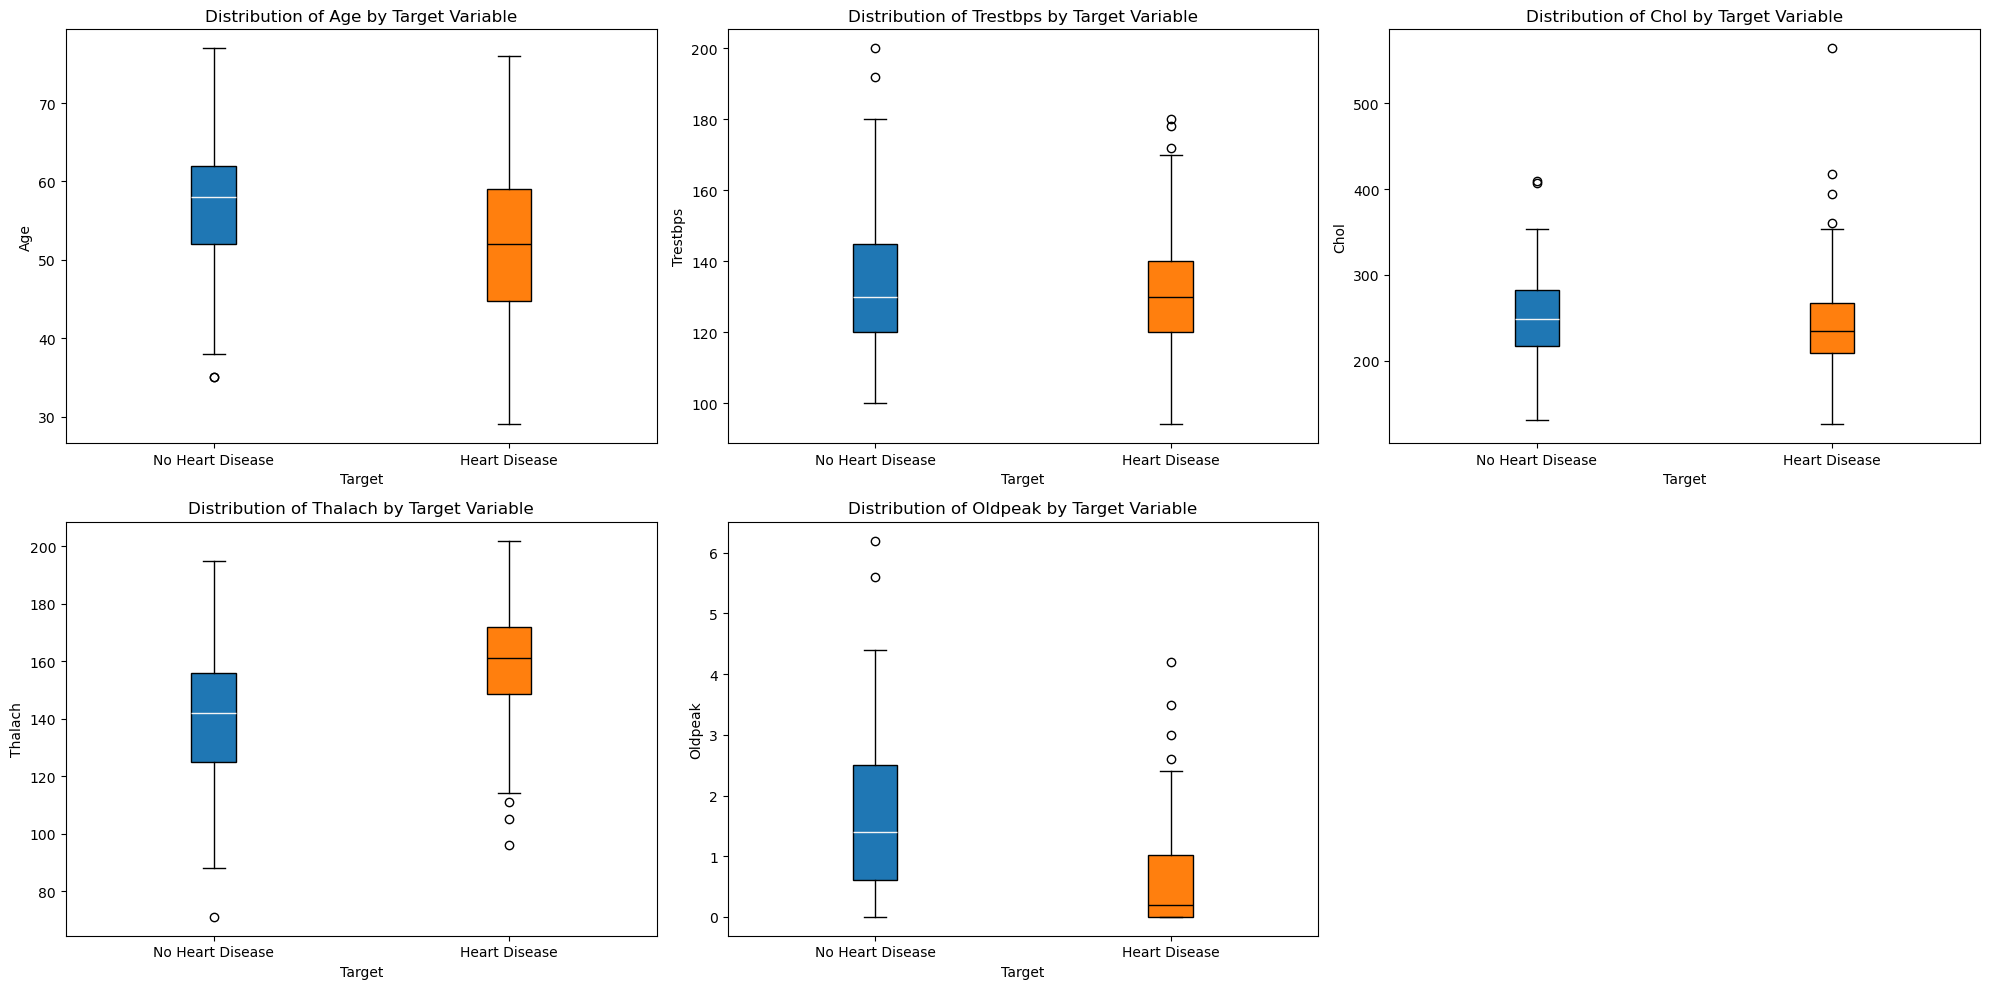

In [196]:
# Ensure the categorical columns are of type 'category'
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for var in categorical_vars:
    df[var] = df[var].astype('category')

# Numeric variables
numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Colors for the plots
colors = ['#1f77b4', '#ff7f0e']
median_colors = ['#f5f5f5', '#000000']  # Set contrasting colors for the medians

# Create subplots for each numeric variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    df_no_disease = df[df['target'] == 0]
    df_disease = df[df['target'] == 1]
    
    bp = axes[i].boxplot([df_no_disease[var], df_disease[var]], patch_artist=True, labels=['No Heart Disease', 'Heart Disease'])
    
    # Color the boxplots
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set median color
    for median, color in zip(bp['medians'], median_colors):
        median.set_color(color)
    
    axes[i].set_title(f'Distribution of {var.capitalize()} by Target Variable')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(var.capitalize())

# Remove the last subplot if there are only 5 plots to display
if len(numeric_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [194]:
conn.close()